# Project SC1015 - Group 3

**Name**: DO DUC ANH<br>
**Name**: TAN JUI KIT JUSTIN<br>
**Name**: TRAN QUE AN<br>

# Problem: <br>
When making a movie, there are some factors that the producer can control, such as how much money they invest, director of the movie, genres of the movies, casts of the movie, etc. We call them <b>pre-production elements<b>. <br>
The producer should always want their movies to be successful. The measurements for these sucessful are some outcome such as revenue of the movies, popularity of the movie, rating of the movie, etc. We call them **post-production elements**. In these elements, revenue is a element that the producer usually care the most.<br>
Our problem: <br>
> Can the producer predict the success of the movie before it is released? Does investing more money mean generating more revenue? <br>
> After releasing the film, with the response from viewers, will it help improve the prediction performance? <br>
>Bonus for customer: building recommendation system base on content <br>

## 1. Import significant modules

In [82]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
import numpy as np
from scipy import stats
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import RidgeCV

## 2. Import the two datasets for analysis

In [83]:
cres = pd.read_csv("credits.csv")
cres.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [84]:
cres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [85]:
print("Number of records:", len(cres['movie_id']))

Number of records: 4803


### Summary: <br>
>**movie_id** : id of the movie <br>
>**title** : title of the movie <br>
>**cast** :  information of cast in the movie <br>
>**crew** :  information of cast in the movie <br>
> There are 4803 records

In [86]:
moviesdata = pd.read_csv("movies.csv")
moviesdata.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [87]:
moviesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [88]:
print("Number of records:", len(moviesdata['title']))

Number of records: 4803


### Summary: <br>
> **Budget** : budget of the company <br>
> **genres** : show genres of the movie <br>
> **homapage** : link to the homepage <br>
> **id** : id of the movie <br>
> **keywords** : show keywords of the data <br>
> **original_language** : show the language of the movie <br>
> **original_title** : original title of the movie <br>
> **overview** : overview of the movie <br>
> **popularity** : popularity rate of the movie <br>
> **production_companies** : name of production company <br>
> **production_countries** : name of production countries <br>
> **release_date** : date of release <br>
> **revenue** : revenue of the movie <br>
> **runtime** : runtime of the movie <br>
> **spoken_languages** : list of spoken language <br>
> **status** : status of the movie (ex. released) <br>
> **tagline** : tagline of the movie <br>
> **vote_average** : average of vote grade <br>
> **vote_count** : number of vote <br>

## 3. Data extraction, curation, preparation and cleaning 

### 3.1. Data extraction

#### Check the number of missing value in this dataset

In [89]:
for item in cres:
    print("Number of missing value in ", item, ": ", cres[item].isna().sum())

Number of missing value in  movie_id :  0
Number of missing value in  title :  0
Number of missing value in  cast :  0
Number of missing value in  crew :  0


We can observe that the **credits** table do not have any missing value

#### Extract columns from credits table

In [90]:
#Extract the columns of the credits table
movie_id = cres['movie_id']
title = cres['title']
cast = cres['cast']
crew = cres['crew']

We will explore some specific columns|

In [91]:
movie_id[0]

19995

In [92]:
title[0]

'Avatar'

In [93]:
# This line is to display the dictionary of cast
cast[0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [94]:
#This line is to display the dictionary of crew
crew[0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

We can see that the cast and crew columns are very complicated string-based dictionaires with many keys for each record. Most of them are string. Therefore, we will proceed to extract the number of cast and crew in each movie as num_cast and num_crew columns as potential features to predict revenue.</br>
Also, I will extract the name of 3 first casts and the director of each of these movies as another feature called **name_cast** and **director** that I will need to use when building recommdation system. Also, I will lower case the charactor and remove all space for the recommendation part later. <br>
#### Extract from cast column


In [95]:
num_cast = []
name_cast = []
for i in range(len(cast)):
    temp = eval(cast[i]) #Convert to list of real dictionaries
    num_cast.append(len(temp)) # Append the number of cast to the list
    temp_name = []
    count = 0
    for ca in temp:
        if count<3:
            count = count+1
            temp_name.append(str.lower(ca['name'].replace(" ","")))
    name_cast.append(temp_name)
print(num_cast[0]) #Test for number of cast in the first film
print("Length of num_cast column", len(num_cast))
print("Length of name_cast column", len(name_cast))
print("List of 3 cast names in the first movie:", name_cast[0])

83
Length of num_cast column 4803
Length of name_cast column 4803
List of 3 cast names in the first movie: ['samworthington', 'zoesaldana', 'sigourneyweaver']


We do the similar extraction with crew factor

In [96]:
num_crew = []
director = []
for i in range(len(crew)):
    temp = eval(crew[i]) #Convert the sting-based dictionaries to list of real dictionaries
    num_crew.append(len(temp)) # Append the number of cast to the list
    for cr in temp:
        if cr['job'] == 'Director':
            director.append(str.lower(cr['name'].replace(" ","")))

In [97]:
print(director[1])
print("Length of num_crew column:", len(num_crew))
print("Director of the first movie:", director[0])

goreverbinski
Length of num_crew column: 4803
Director of the first movie: jamescameron


#### Summary: <br>
From the ***credits*** dataset, we have 6 variales: <br>
***- movie_id***<br>
***- title***<br>
***- num_cast***: Used for regression model<br>
***- num_crew***: Used for regression model<br>
***- name_cast***: Used for recommendation system<br>
***- director***: Used for recommendation system<br>
with totally 4803 record.
****

### Extract the data from movies dataset

#### Check the missing value and fill with default value

In [98]:
for item in moviesdata:
    missval = moviesdata[item].isna().sum()
    print("Number of missing value in ", item, ": ", missval)

Number of missing value in  budget :  0
Number of missing value in  genres :  0
Number of missing value in  homepage :  3091
Number of missing value in  id :  0
Number of missing value in  keywords :  0
Number of missing value in  original_language :  0
Number of missing value in  original_title :  0
Number of missing value in  overview :  3
Number of missing value in  popularity :  0
Number of missing value in  production_companies :  0
Number of missing value in  production_countries :  0
Number of missing value in  release_date :  1
Number of missing value in  revenue :  0
Number of missing value in  runtime :  2
Number of missing value in  spoken_languages :  0
Number of missing value in  status :  0
Number of missing value in  tagline :  844
Number of missing value in  title :  0
Number of missing value in  vote_average :  0
Number of missing value in  vote_count :  0


Here, we observe some missing values in variables homepage, release_date, overview, runtime, tagline. <br>
We will then fill these missing values with some default ones.

In [99]:
moviesdata['homepage'] = moviesdata['homepage'].fillna('')
moviesdata['overview'] = moviesdata['overview'].fillna('')
moviesdata['release_date'] = moviesdata['release_date'].fillna('')
moviesdata['runtime'] = moviesdata['runtime'].fillna(0)
moviesdata['tagline'] = moviesdata['tagline'].fillna('')

#### Extract the columns of the table

In [100]:
budget = moviesdata['budget']
genres = moviesdata['genres']
# homepage: We ignore this variable
# id: We have the id from the credit dataset
keywords = moviesdata['keywords']
original_language = moviesdata['original_language']
original_title = moviesdata['original_title']
popularity = moviesdata['popularity']
production_companies = moviesdata['production_companies']
production_countries = moviesdata['production_countries']
release_day = moviesdata['release_date']
revenue = moviesdata['revenue']
runtime = moviesdata['runtime']
spoken_languages = moviesdata['spoken_languages']
status = moviesdata['status']
tagline = moviesdata['tagline']
# title: already from the credit dataset
vote_average = moviesdata['vote_average']
vote_count = moviesdata['vote_count']

#### Count the number of genres and the list of genres for each movies

In this part, we extract the number of genres, as a possible features for predicting revenue. Also, we extract 3 first genres, lower case them and remove space for recommendation later.

In [101]:
genres[0] #explore first element in genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [102]:
num_genres = []
name_genres = []
for i in range(len(genres)):
    temp = eval(genres[i])
    num_genres.append(len(temp))
    temp_name = []
    count = 0
    for ge in temp:
        if count<4:
            count = count+1
            temp_name.append(str.lower(ge['name'].replace(" ","")))
    name_genres.append(temp_name)
print(num_genres[0])
print(name_genres[0])

4
['action', 'adventure', 'fantasy', 'sciencefiction']


In [103]:
genres_list = set()
for na in name_genres:
    for n in na:
        genres_list.add(n)
genres_list = list(genres_list)
genres_list

['crime',
 'sciencefiction',
 'adventure',
 'comedy',
 'romance',
 'tvmovie',
 'history',
 'war',
 'western',
 'mystery',
 'foreign',
 'fantasy',
 'thriller',
 'action',
 'drama',
 'documentary',
 'animation',
 'music',
 'family',
 'horror']

#### Transform this categorical variable in to one-hot encoding

In [104]:
genres_d = pd.DataFrame()
for genres in genres_list:
    temp = []
    for i in range(len(name_genres)):
        temp.append(1 if genres in name_genres[i] else 0)
    genres_d[genres] = pd.Series(temp).values
    moviesdata[genres] = pd.Series(temp).values

In [105]:
genres_d.head()

,crime,sciencefiction,adventure,comedy,romance,tvmovie,history,war,western,mystery,foreign,fantasy,thriller,action,drama,documentary,animation,music,family,horror
0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [106]:
moviesdata.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,foreign,fantasy,thriller,action,drama,documentary,animation,music,family,horror
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,0,1,0,1,0,0,0,0,0,0
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,0,1,0,1,0,0,0,0,0,0
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,0,0,0,1,0,0,0,0,0,0
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,0,0,1,1,1,0,0,0,0,0
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,0,0,0,1,0,0,0,0,0,0


In [107]:
moviesdata[genres]

0       0
1       0
2       0
3       0
4       0
       ..
4798    0
4799    0
4800    0
4801    0
4802    0
Name: horror, Length: 4803, dtype: int64

#### Extract the keywords

In [108]:
num_keywords = []
name_keywords = []
for i in range(len(keywords)):
    temp = eval(keywords[i])
    num_keywords.append(len(temp))
    temp_name = []
    count = 0
    for key in temp:
        if count<3:
            count = count+1
            temp_name.append(str.lower(key['name'].replace(" ","")))
    name_keywords.append(temp_name)
print(num_keywords[0])
print(name_keywords[0])

21
['cultureclash', 'future', 'spacewar']


#### Convert all features to dataframe

In [109]:
num_cast_d = pd.DataFrame(num_cast)
num_crew_d = pd.DataFrame(num_crew)
budget_d = pd.DataFrame(budget)
num_genres_d = pd.DataFrame(num_genres)
num_keywords_d = pd.DataFrame(num_keywords)
popularity_d = pd.DataFrame(popularity)
runtime_d = pd.DataFrame(runtime)
vote_average_d = pd.DataFrame(vote_average)
vote_count_d = pd.DataFrame(vote_count)
revenue_d = pd.DataFrame(revenue)


### 3.2. Normalize the distribution of the varibales by using log scale and remove outliers

In [110]:
data_o = pd.concat([revenue_d, budget_d, num_cast_d, num_crew_d, genres_d, popularity_d, vote_count_d, vote_average_d], axis = 1).reindex(budget_d.index)
data_o.columns = ['revenue', 'budget', 'num_cast', 'num_crew', 'sciencefiction','action','western','comedy','mystery','war','documentary','history','adventure','romance','crime','family','tvmovie','drama','music','animation','fantasy','horror','foreign','thriller', 'popularity', 'vote_count', 'vote_average']
data_o.shape

(4803, 27)

In [111]:
from sklearn import preprocessing
data_o1 = data_o.copy() #copy of data_o
data_o1.loc[:, ['revenue', 'budget', 'popularity', 'vote_count', 'vote_average']] = preprocessing.normalize(data_o1.loc[:, ['revenue', 'budget', 'popularity', 'vote_count', 'vote_average']])

In [112]:
data_o1.loc[:, ['revenue', 'budget', 'popularity', 'vote_count', 'vote_average']]

,revenue,budget,popularity,vote_count,vote_average
0,0.996406,0.084703,5.376572e-08,0.000004,2.573248e-09
1,0.954568,0.297992,1.381518e-07,0.000004,6.853820e-09
2,0.963414,0.268018,1.174648e-07,0.000005,6.891885e-09
3,0.974464,0.224543,1.008766e-07,0.000008,6.826122e-09
4,0.737750,0.675074,1.140538e-07,0.000006,1.583828e-08
...,...,...,...,...,...
4798,0.994240,0.107174,6.951572e-06,0.000116,3.215210e-06
4799,0.000000,1.000000,7.139464e-05,0.000556,6.555553e-04
4800,0.000000,0.000000,1.547871e-01,0.642948,7.501059e-01
4801,0.000000,0.000000,9.451143e-02,0.771965,6.285999e-01


### Measure the knewness and kurtosis of data 

In [113]:
data_o.loc[:, ['revenue', 'budget', 'popularity', 'vote_count', 'vote_average']].skew()

revenue         4.444716
budget          2.437211
popularity      9.721416
vote_count      3.824069
vote_average   -1.959710
dtype: float64

In [114]:
data_o.loc[:, ['revenue', 'budget', 'popularity', 'vote_count', 'vote_average']].kurt()

revenue          33.123630
budget            7.658060
popularity      191.995820
vote_count       19.913946
vote_average      7.792363
dtype: float64

In [115]:
data_o.loc[:, ['revenue', 'budget', 'popularity', 'vote_count', 'vote_average']]

,revenue,budget,popularity,vote_count,vote_average
0,2787965087,237000000,150.437577,11800,7.2
1,961000000,300000000,139.082615,4500,6.9
2,880674609,245000000,107.376788,4466,6.3
3,1084939099,250000000,112.312950,9106,7.6
4,284139100,260000000,43.926995,2124,6.1
...,...,...,...,...,...
4798,2040920,220000,14.269792,238,6.6
4799,0,9000,0.642552,5,5.9
4800,0,0,1.444476,6,7.0
4801,0,0,0.857008,7,5.7


### Plot the graphs for each of the variables

/Users/ducanhdo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ducanhdo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ducanhdo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

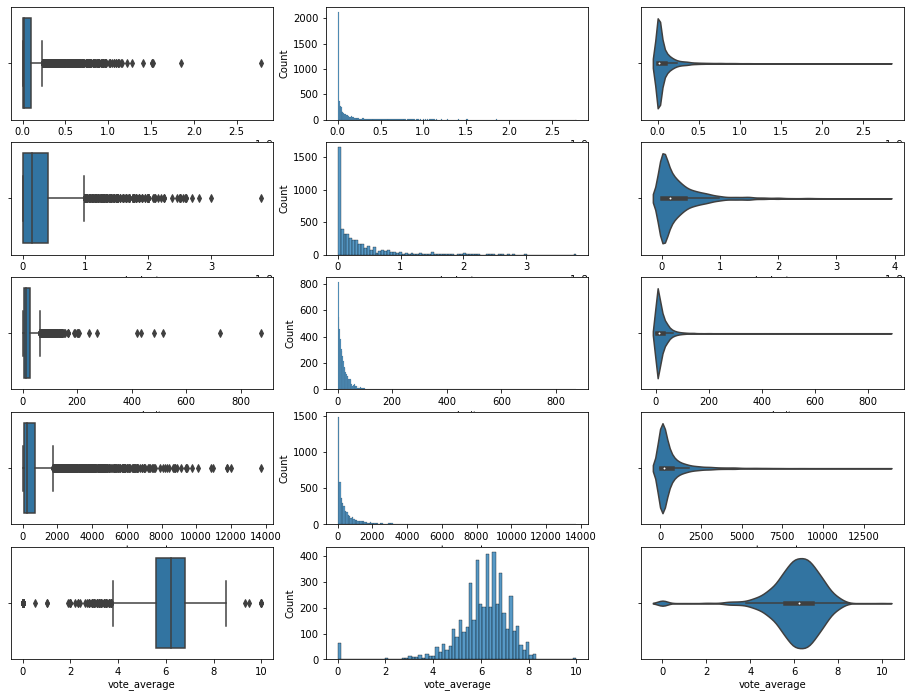

In [116]:
f, axes = plt.subplots(5, 3, figsize=(16, 12))

count = 0
for var in data_o.loc[:, ['revenue', 'budget', 'popularity', 'vote_count', 'vote_average']]:
    sb.boxplot(data_o[var], orient = "h", ax = axes[count,0])
    sb.histplot(data_o[var], ax = axes[count,1])
    sb.violinplot(data_o[var], orient = "h", ax = axes[count,2])
    count += 1

We can see that the distribution of this data is positve skew. Therefore, we proceed to some normalization and cut the outlier to make it more uniform.

In [117]:
data_process = data_o
data_process.shape

(4803, 27)

We remove all records with '0' value, as when we transform to log scale, and log(0) will go to -infinity. 

In [118]:
data_process = data_process[data_process['budget'] > 0]
data_process = data_process[data_process['revenue'] > 0]
data_process = data_process[data_process['vote_count'] > 0]
data_process = data_process[data_process['popularity'] > 0]
data_process.shape

(3227, 27)

#### Transform the dataset into log scale to make it more uniform

In [119]:
budget_log = pd.DataFrame(np.log(data_process['budget']))
revenue_log = pd.DataFrame(np.log(data_process['revenue']))
popularity_log = pd.DataFrame(np.log(data_process['popularity']))
vote_count_log = pd.DataFrame(np.log(data_process['vote_count']))

In [120]:
data_log = pd.concat([budget_log, revenue_log, num_cast_d, num_crew_d, genres_d, popularity_log, vote_count_log, vote_average_d], axis = 1).reindex(budget_log.index)
data_log.columns = ['budget', 'revenue', 'num_cast', 'num_crew', 'sciencefiction','action','western','comedy','mystery','war','documentary','history','adventure','romance','crime','family','tvmovie','drama','music','animation','fantasy','horror','foreign','thriller', 'popularity', 'vote_count', 'vote_average']
data_log.shape

(3227, 27)

Here, we use a function called ***zscore*** from stats in scipy. The function of this function is to to measure the distance of the point to mean over the standard deviation. If more than 3 times or the point lies out of 3 standard deviation, we cut that record. 

In [121]:
data_log = data_log[(np.abs(stats.zscore(data_log['budget'])) < 3)]
data_log = data_log[(np.abs(stats.zscore(data_log['revenue'])) < 3)]
data_log = data_log[(np.abs(stats.zscore(data_log['popularity'])) < 3)]
data_log = data_log[(np.abs(stats.zscore(data_log['vote_count'])) < 3)]
data_log.shape

(3098, 27)

/Users/ducanhdo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ducanhdo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ducanhdo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

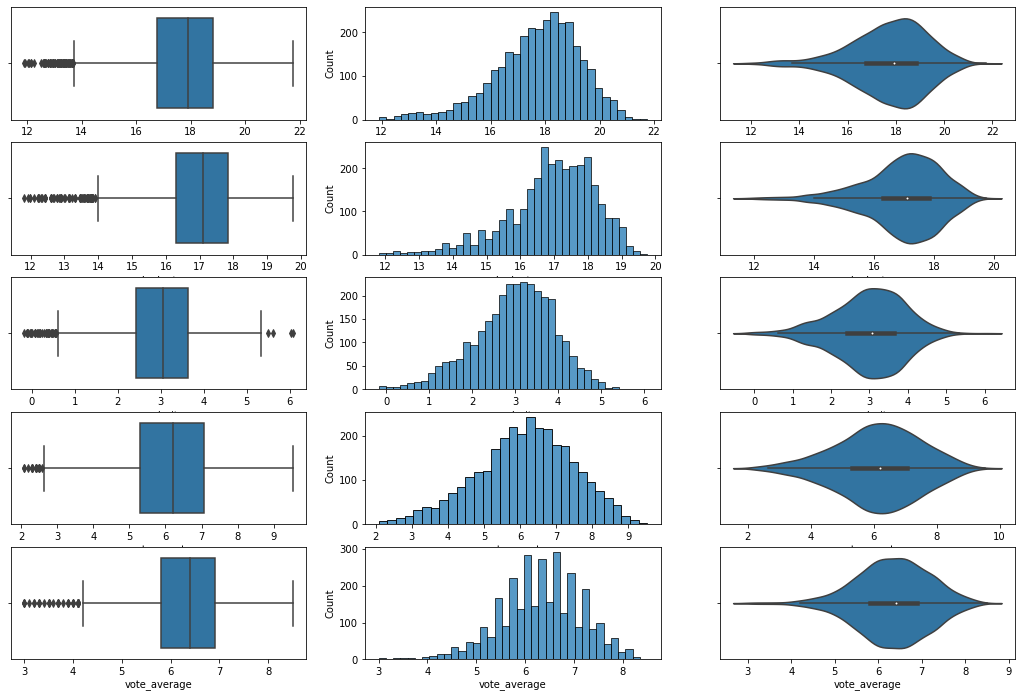

In [122]:
f, axes = plt.subplots(5, 3, figsize=(18, 12))

count = 0
for var in data_o.loc[:, ['revenue', 'budget', 'popularity', 'vote_count', 'vote_average']]:
    sb.boxplot(data_log[var], orient = "h", ax = axes[count,0])
    sb.histplot(data_log[var], ax = axes[count,1])
    sb.violinplot(data_log[var], orient = "h", ax = axes[count,2])
    count += 1

In [123]:
data_log.loc[:, ['revenue', 'budget', 'popularity', 'vote_count', 'vote_average']].skew()

revenue        -0.677596
budget         -0.840173
popularity     -0.413783
vote_count     -0.286842
vote_average   -0.358957
dtype: float64

In [124]:
data_log.loc[:, ['revenue', 'budget', 'popularity', 'vote_count', 'vote_average']].kurt()

revenue         0.572837
budget          0.890514
popularity      0.192931
vote_count     -0.185193
vote_average    0.332166
dtype: float64

Now, our data is more uniform and less skewed.

## 4. Exploratory data analysis/visualization to gather relevant insights

In [125]:
data_log.describe()

,budget,revenue,num_cast,num_crew,sciencefiction,action,western,comedy,mystery,war,...,drama,music,animation,fantasy,horror,foreign,thriller,popularity,vote_count,vote_average
count,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.0,...,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000
mean,16.949055,17.714582,26.576501,34.863460,0.161394,0.125242,0.207230,0.341511,0.172046,0.0,...,0.288896,0.439961,0.009038,0.058102,0.031311,0.108134,0.100387,2.986412,6.131337,6.325339
std,1.273891,1.576674,21.665511,35.371232,0.367954,0.331047,0.405388,0.474293,0.377482,0.0,...,0.453323,0.496462,0.094654,0.233974,0.174184,0.310600,0.300564,0.931786,1.344940,0.844225
min,11.805632,11.894112,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.179585,2.079442,3.000000
25%,16.300417,16.782571,15.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.420102,5.299564,5.800000
50%,17.111347,17.909855,20.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.055700,6.210600,6.400000
75%,17.854137,18.832300,31.000000,45.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.640710,7.075809,6.900000
max,19.755682,21.748578,224.000000,435.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.073686,9.528940,8.500000


### Explore statistics of essential variables

In [126]:
data_log[['budget','revenue', 'num_cast', 'num_crew', 'popularity', 'vote_count', 'vote_average']].describe()

,budget,revenue,num_cast,num_crew,popularity,vote_count,vote_average
count,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000
mean,16.949055,17.714582,26.576501,34.863460,2.986412,6.131337,6.325339
std,1.273891,1.576674,21.665511,35.371232,0.931786,1.344940,0.844225
min,11.805632,11.894112,0.000000,1.000000,-0.179585,2.079442,3.000000
25%,16.300417,16.782571,15.000000,12.000000,2.420102,5.299564,5.800000
50%,17.111347,17.909855,20.000000,21.000000,3.055700,6.210600,6.400000
75%,17.854137,18.832300,31.000000,45.000000,3.640710,7.075809,6.900000
max,19.755682,21.748578,224.000000,435.000000,6.073686,9.528940,8.500000


### Plot Revenue Variable

/Users/ducanhdo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ducanhdo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='revenue'>

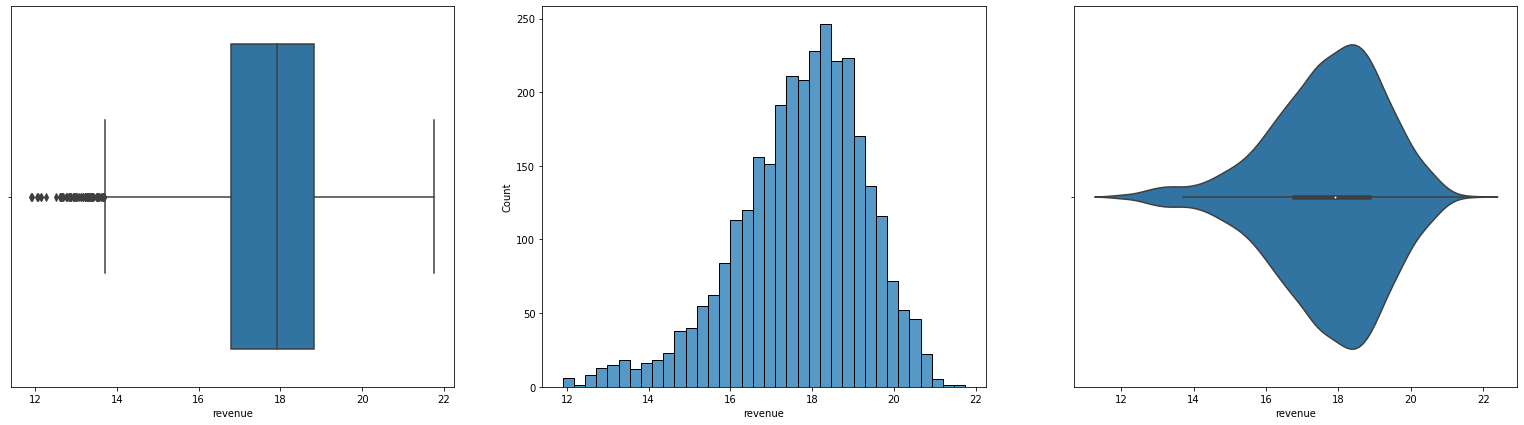

In [127]:
f, axes = plt.subplots(1, 3, figsize =(27, 7))
sb.boxplot(data_log['revenue'], orient = "h", ax = axes[0])
sb.histplot(data_log['revenue'], ax = axes[1])
sb.violinplot(data_log['revenue'], orient = "h", ax = axes[2])

### 4.1. Pre-production elements uni-varite analysis

Now, we have 4 pre-production elements: <br>
> **budget** <br>
> **num_cast**<br>
> **num_crew**<br>
> **genres**: 20 genres are used as 20 different features<br>

#### Budget, num_cast, num_crew

/Users/ducanhdo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ducanhdo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ducanhdo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

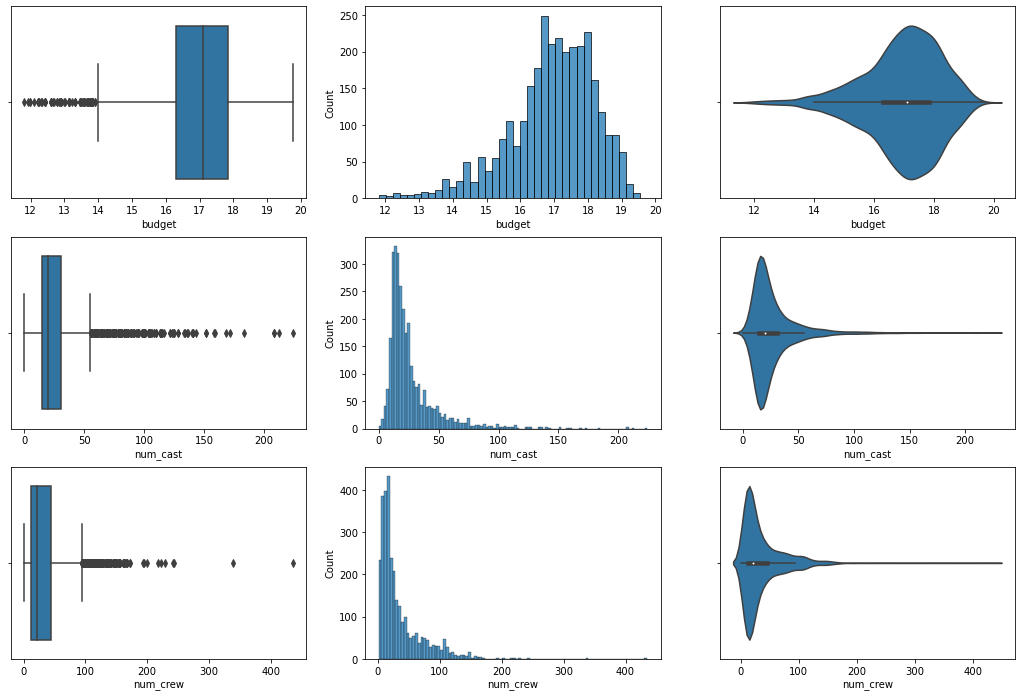

In [128]:
# Draw the distributions of all Predictors
f, axes = plt.subplots(3, 3, figsize=(18, 12))

pos = 0
for var in ['budget', 'num_cast', 'num_crew']:
    sb.boxplot(data_log[var], orient = "h", ax = axes[pos,0])
    sb.histplot(data_log[var], ax = axes[pos,1])
    sb.violinplot(data_log[var], orient = "h", ax = axes[pos,2])
    pos += 1

#### Genres

In [129]:
num_genres = data_log[genres_list].sum(axis = 0)
num_genres

crime                0
sciencefiction     500
adventure           49
comedy            1058
romance            245
tvmovie            864
history            103
war                  0
western            642
mystery            533
foreign            335
fantasy            180
thriller           311
action             388
drama              895
documentary        141
animation           28
music             1363
family             317
horror              97
dtype: int64

Text(0, 0.5, 'Genres Count')

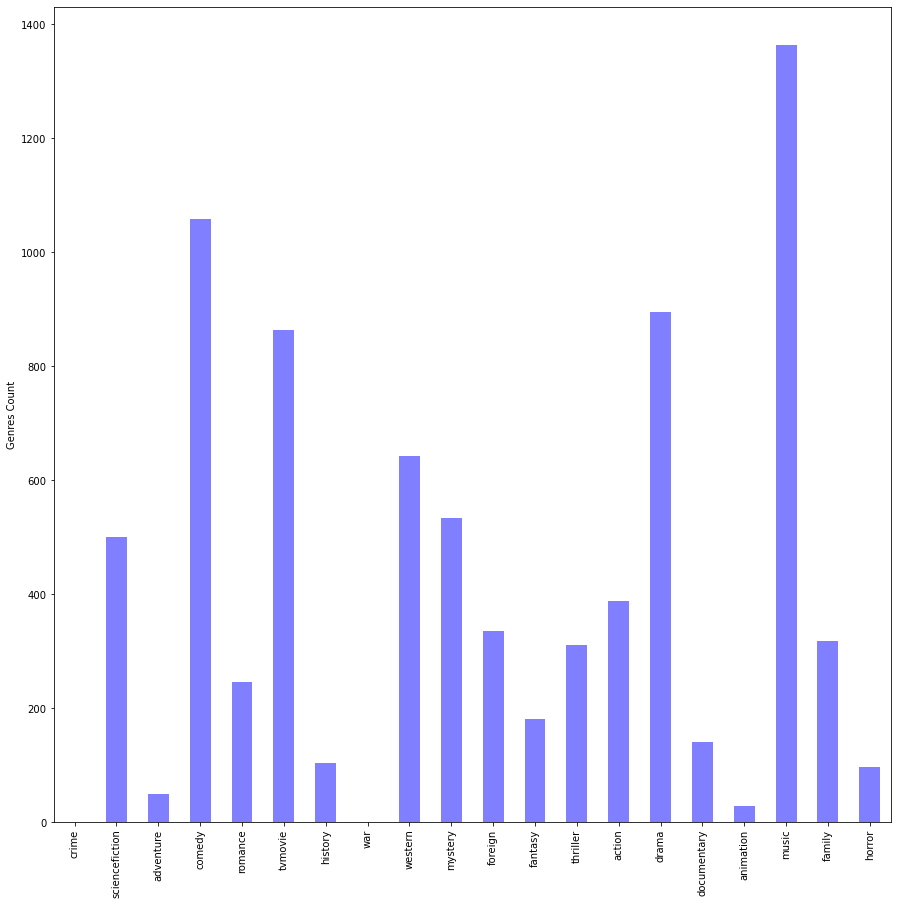

In [130]:
plt.subplots(figsize=(15, 15))
num_genres.plot.bar(align='center', alpha=0.5, color='blue')
#y_pos = np.arange(num_genres)
#plt.xticks(y_pos, name_genres)
plt.ylabel('Genres Count')

### 4.2. Post-production elements uni-variate analysis

We have 3 post-production elements: <br>
> **popularity** <br>
> **vote_count** <br>
> **vote_average** <br>

/Users/ducanhdo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ducanhdo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ducanhdo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

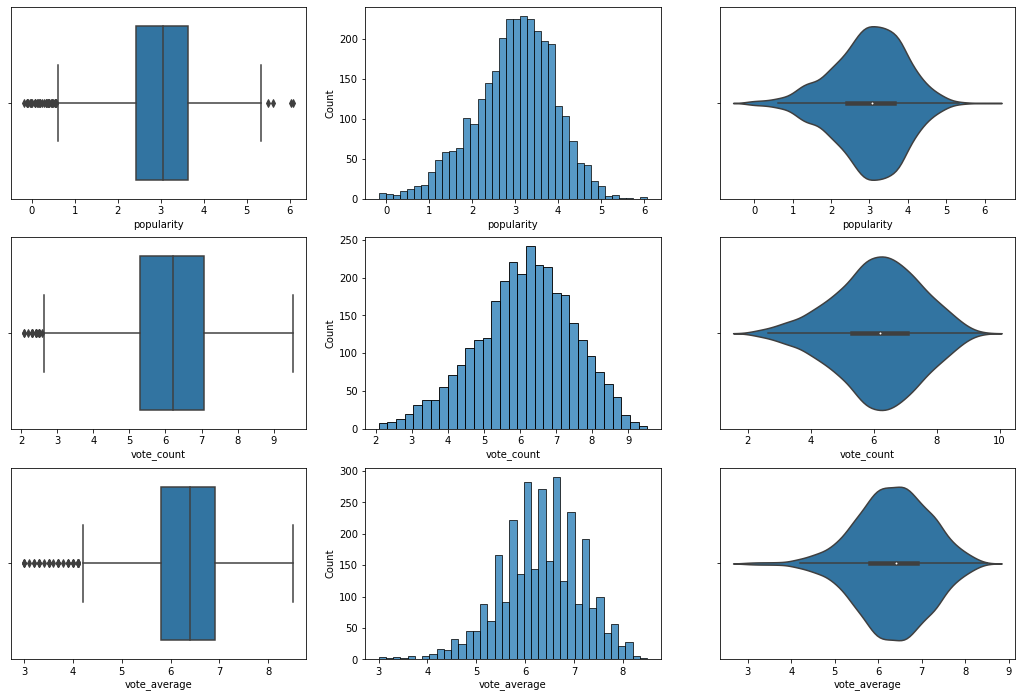

In [131]:
f, axes = plt.subplots(3, 3, figsize=(18, 12))

pos = 0
for var in ['popularity', 'vote_count', 'vote_average']:
    sb.boxplot(data_log[var], orient = "h", ax = axes[pos,0])
    sb.histplot(data_log[var], ax = axes[pos,1])
    sb.violinplot(data_log[var], orient = "h", ax = axes[pos,2])
    pos += 1

### 5.2. Multi-variate exploratory

In [132]:
correlation = data_log.corr()['revenue'][:]
correlation.sort_values()

music            -0.204297
animation        -0.084818
mystery          -0.071965
adventure        -0.070136
thriller         -0.067081
sciencefiction   -0.057001
documentary      -0.034417
horror           -0.026968
romance          -0.004931
comedy           -0.004499
history          -0.002778
tvmovie           0.010767
action            0.095733
vote_average      0.125916
drama             0.161806
family            0.162234
fantasy           0.169732
foreign           0.196366
western           0.262147
num_cast          0.282160
num_crew          0.349847
budget            0.638766
popularity        0.652001
vote_count        0.707789
revenue           1.000000
war                    NaN
crime                  NaN
Name: revenue, dtype: float64

we can see that some pre-production elements that has a higher correlation to revenue is **budget, num_crew, num_cast, thriller**

In [133]:
data_F = pd.DataFrame(data_log[['revenue', 'budget', 'num_crew', 'num_cast',]])

<AxesSubplot:>

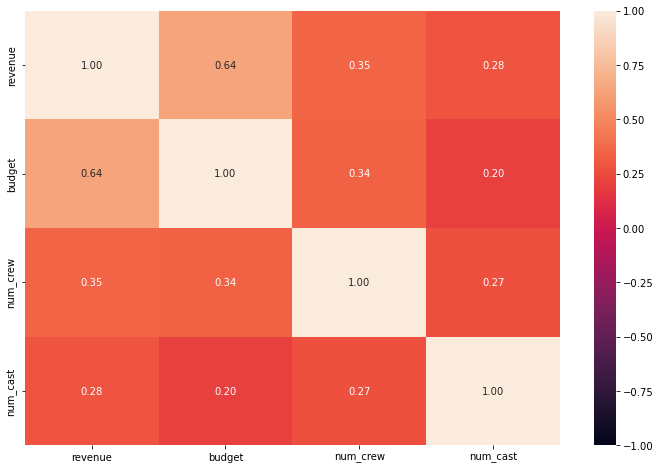

In [134]:
f = plt.figure(figsize=(12, 8))
sb.heatmap(data_F.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

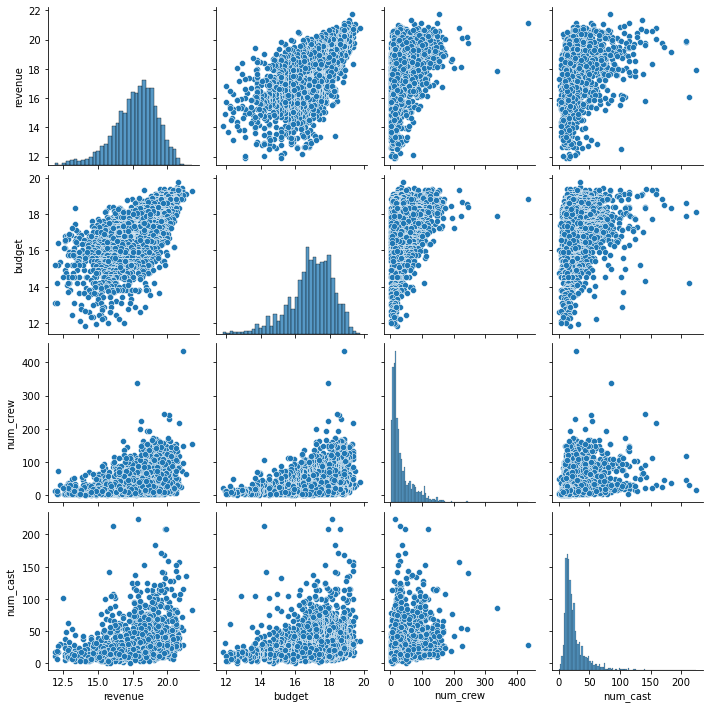

In [135]:
sb.pairplot(data = data_F)

From the correlation matrix, there are some post-production elements that have high correlation such as **popularity, vote_count**

In [136]:
data_P = pd.DataFrame(data_log[['revenue', 'popularity', 'vote_count']])

<AxesSubplot:>

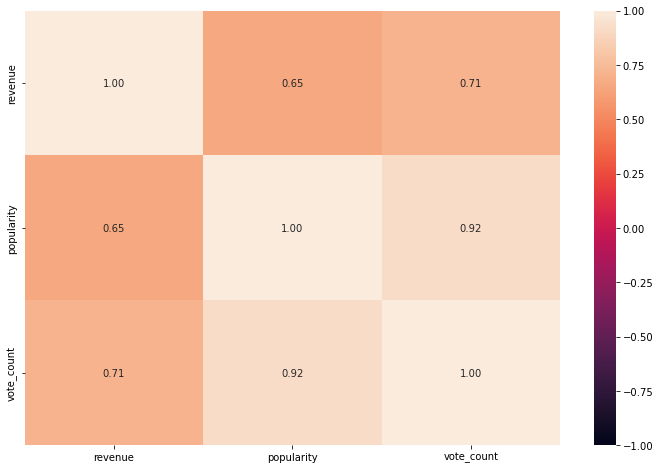

In [137]:
f = plt.figure(figsize=(12, 8))
sb.heatmap(data_P.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

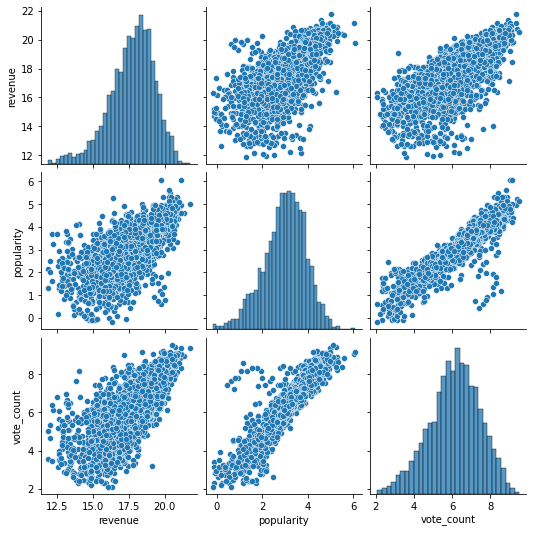

In [138]:
sb.pairplot(data = data_P)

## 5. Building regression models:

Some note on data<br>
> **data_F**: preprocessed pre-production elements data frame <br>
> **data_P**: preprocessed post-production elements data frame <br>
> **data_log**: all elements

### Model 1: Linear regression model with pre-production elements using Linear Regression 

In [143]:
#data_train = data_log.drop(['revenue'], axis = 1)
train, test = train_test_split(data_log, test_size = 0.25)

In [144]:
X_train = pd.DataFrame(train[['revenue', 'budget', 'num_crew', 'num_cast', 'thriller']]).drop(['revenue'], axis = 1)
y_train = pd.DataFrame(train['revenue'])
X_test = pd.DataFrame(test[['revenue', 'budget', 'num_crew', 'num_cast', 'thriller']]).drop(['revenue'], axis = 1)
y_test = pd.DataFrame(test['revenue'])
print("Shape of train set:", X_train.shape, y_train.shape)
print("Shape of test set:", X_test.shape, y_test.shape)

Shape of train set: (2323, 4) (2323, 1)
Shape of test set: (775, 4) (775, 1)


In [145]:
linreg = LinearRegression()         
linreg.fit(X_train, y_train)
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

Intercept of Regression 	: b =  [4.90977256]
Coefficients of Regression 	: a =  [[0.72761222 0.00490547 0.00982822 0.20599433]]



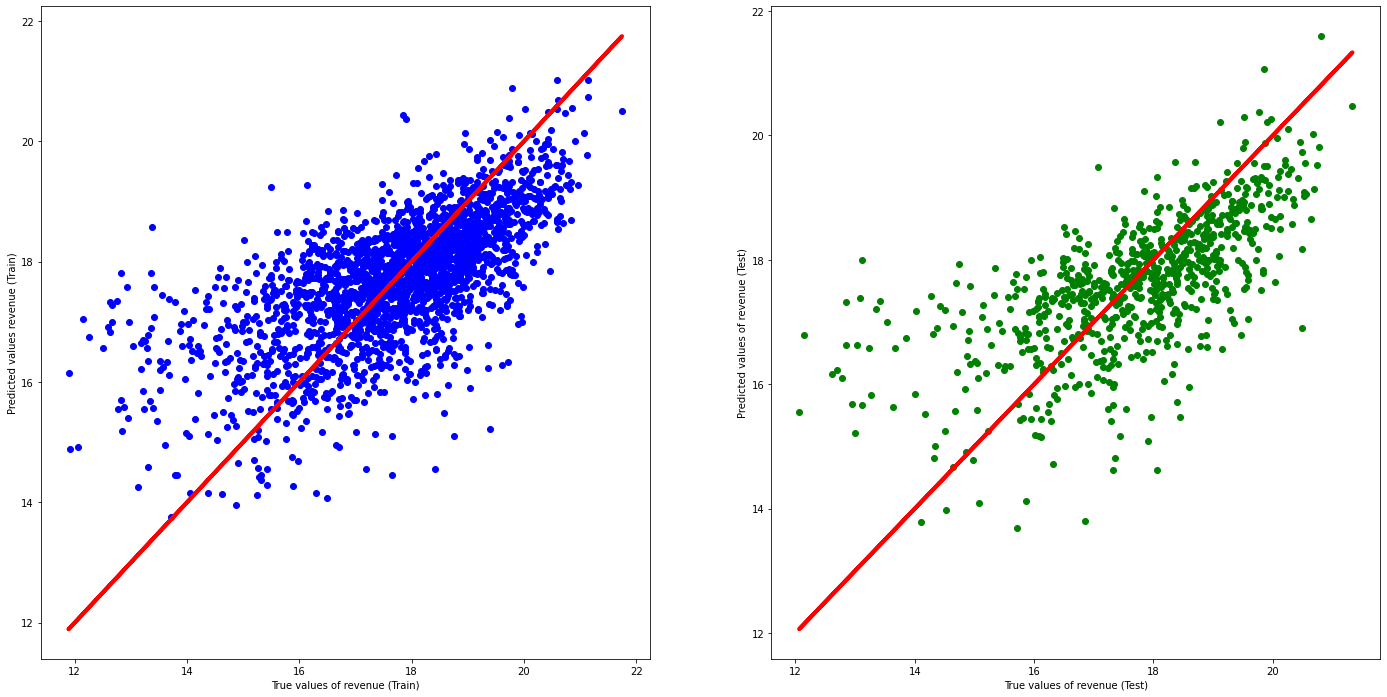

In [146]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 4)
axes[0].set_xlabel("True values of revenue (Train)")
axes[0].set_ylabel("Predicted values revenue (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 4)
axes[1].set_xlabel("True values of revenue (Test)")
axes[1].set_ylabel("Predicted values of revenue (Test)")
plt.show()

In [147]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4457467329026713
Mean Squared Error (MSE) 	: 1.3666071401288302

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.44718720601917117
Mean Squared Error (MSE) 	: 1.4059192178954931



#### Some insights from budget
We can see that the performance is quite poor with low score. There are some correlation between budget and revenue but not very high. There is a trend in the data pattern, which means increase budget can also contribute to increase the revenue, but the formular (model) base on budget is not enough to predict the upcoming revenue.<br> 
The producer, in this case, can not just base on budget to predict there success. There should also be other factors that affect the revenue as well. <br>
Let's build a model with other pre-production elements to see if there is any improvement.

### Model 2: Regression model base on pre-production elements that producer can control using XgBoost

Shape of train set: (2323, 4) (2323, 1)
Shape of test set: (775, 4) (775, 1)


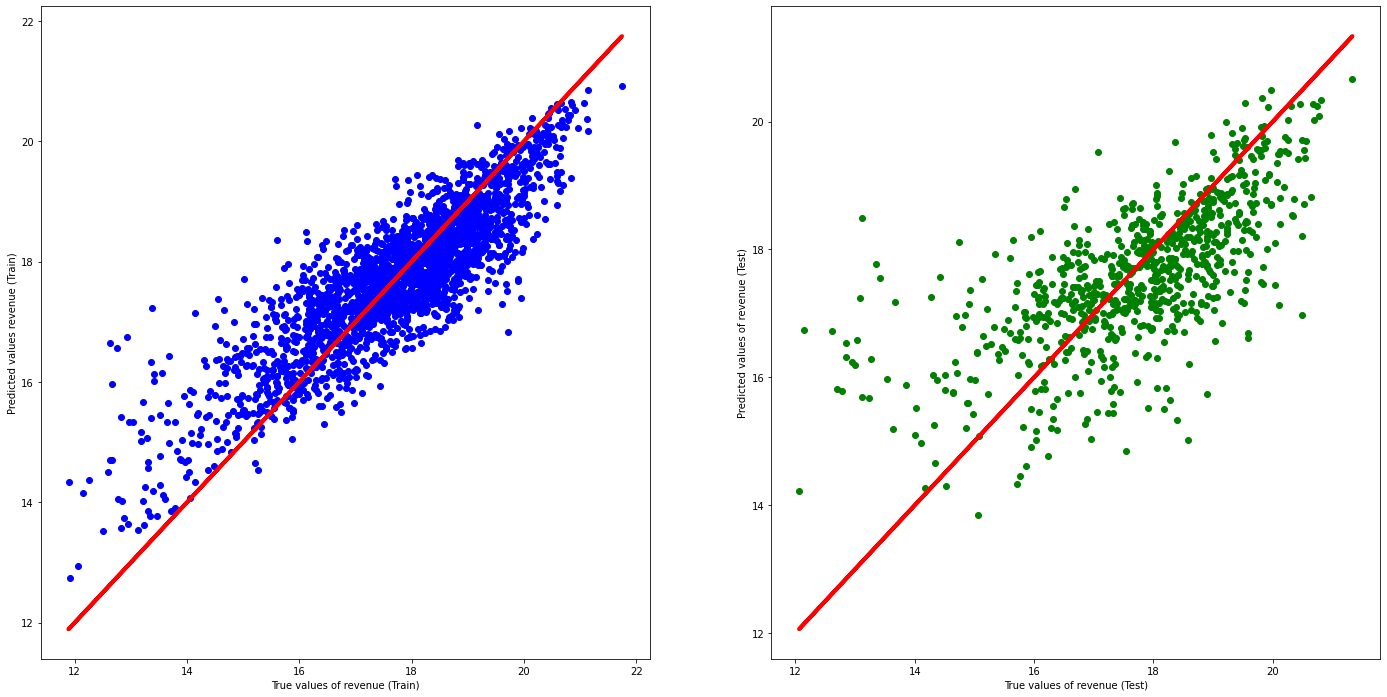

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7413771752267442
Mean Squared Error (MSE) 	: 0.6376792342359874

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4625854782126597
Mean Squared Error (MSE) 	: 1.3667581727190279



In [148]:
X_train = pd.DataFrame(train[['revenue', 'budget', 'num_crew', 'num_cast', 'thriller']]).drop(['revenue'], axis = 1)
y_train = pd.DataFrame(train['revenue'])
X_test = pd.DataFrame(test[['revenue', 'budget', 'num_crew', 'num_cast', 'thriller']]).drop(['revenue'], axis = 1)
y_test = pd.DataFrame(test['revenue'])


print("Shape of train set:", X_train.shape, y_train.shape)
print("Shape of test set:", X_test.shape, y_test.shape)

import xgboost

xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train)

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 4)
axes[0].set_xlabel("True values of revenue (Train)")
axes[0].set_ylabel("Predicted values revenue (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 4)
axes[1].set_xlabel("True values of revenue (Test)")
axes[1].set_ylabel("Predicted values of revenue (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", xgb.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", xgb.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Now, we can see that the performance seems to be improved, but not very significant. There is a formular (model) to predict revenue but there performance is not very high. Therefore, before release, it is hard for the company to predicts the revenue. 

Let's take a look again at the correlation matrix with other post-production elements factor as well.

In [149]:
correlation = data_log.corr()['revenue'][:]
correlation.sort_values()

music            -0.204297
animation        -0.084818
mystery          -0.071965
adventure        -0.070136
thriller         -0.067081
sciencefiction   -0.057001
documentary      -0.034417
horror           -0.026968
romance          -0.004931
comedy           -0.004499
history          -0.002778
tvmovie           0.010767
action            0.095733
vote_average      0.125916
drama             0.161806
family            0.162234
fantasy           0.169732
foreign           0.196366
western           0.262147
num_cast          0.282160
num_crew          0.349847
budget            0.638766
popularity        0.652001
vote_count        0.707789
revenue           1.000000
war                    NaN
crime                  NaN
Name: revenue, dtype: float64

We can see that, the correlation is higher on some post-production elements, such as popularity, vote_count. Therefore, it seems to be easier to use post elements to predict the revenue of the movie by some post-production elements.

### Model 3: Regression model base on post-production elements by using Linear Regression

Shape of train set: (2323, 2) (2323, 1)
Shape of test set: (775, 2) (775, 1)
Intercept of Regression 	: b =  [12.6694315]
Coefficients of Regression 	: a =  [[0.04174486 0.80203092]]



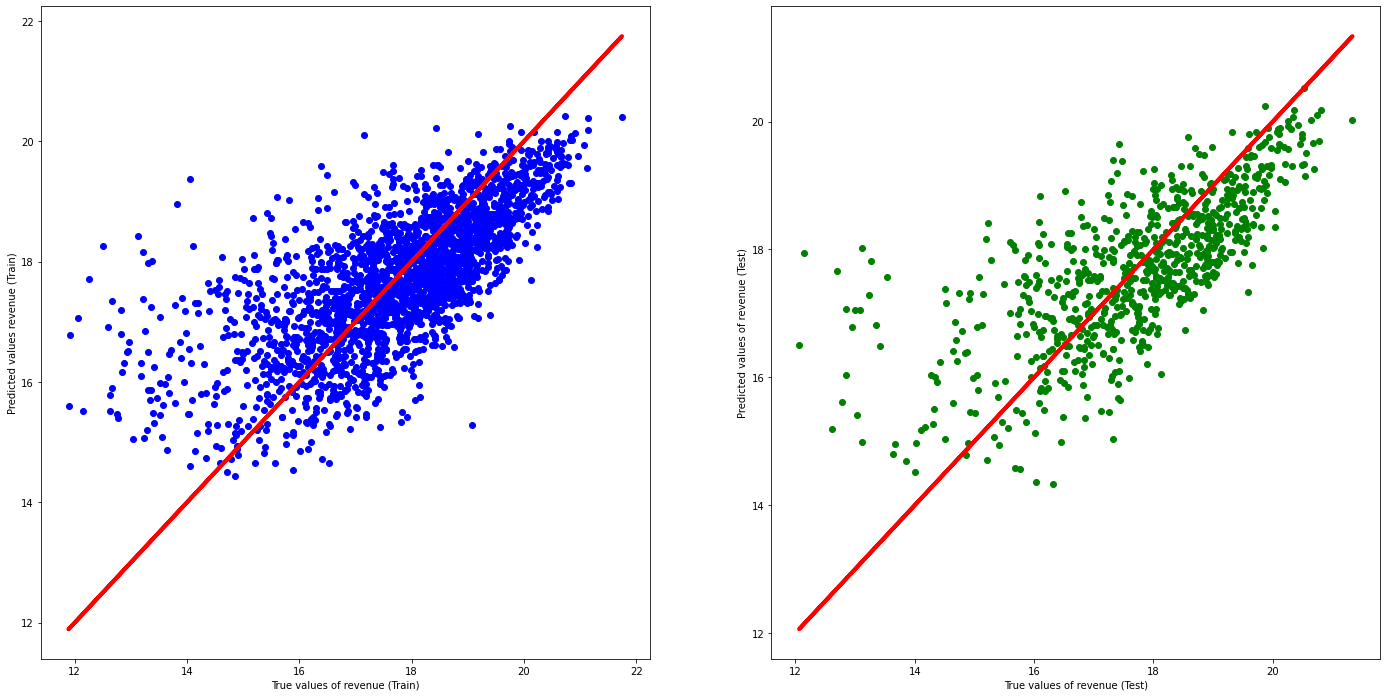

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.49644260050467703
Mean Squared Error (MSE) 	: 1.2416077242430943

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5138436863783248
Mean Squared Error (MSE) 	: 1.236397767316588



In [150]:
X_train = pd.DataFrame(train[['revenue', 'popularity', 'vote_count']]).drop(['revenue'], axis = 1)
y_train = pd.DataFrame(train['revenue'])
X_test = pd.DataFrame(test[['revenue', 'popularity', 'vote_count']]).drop(['revenue'], axis = 1)
y_test = pd.DataFrame(test['revenue'])
print("Shape of train set:", X_train.shape, y_train.shape)
print("Shape of test set:", X_test.shape, y_test.shape)
linreg = LinearRegression()         
linreg.fit(X_train, y_train)
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 4)
axes[0].set_xlabel("True values of revenue (Train)")
axes[0].set_ylabel("Predicted values revenue (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 4)
axes[1].set_xlabel("True values of revenue (Test)")
axes[1].set_ylabel("Predicted values of revenue (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

### Model 4: Regression model base on post-production elements by using XgBoost

Shape of train set: (2323, 2) (2323, 1)
Shape of test set: (775, 2) (775, 1)


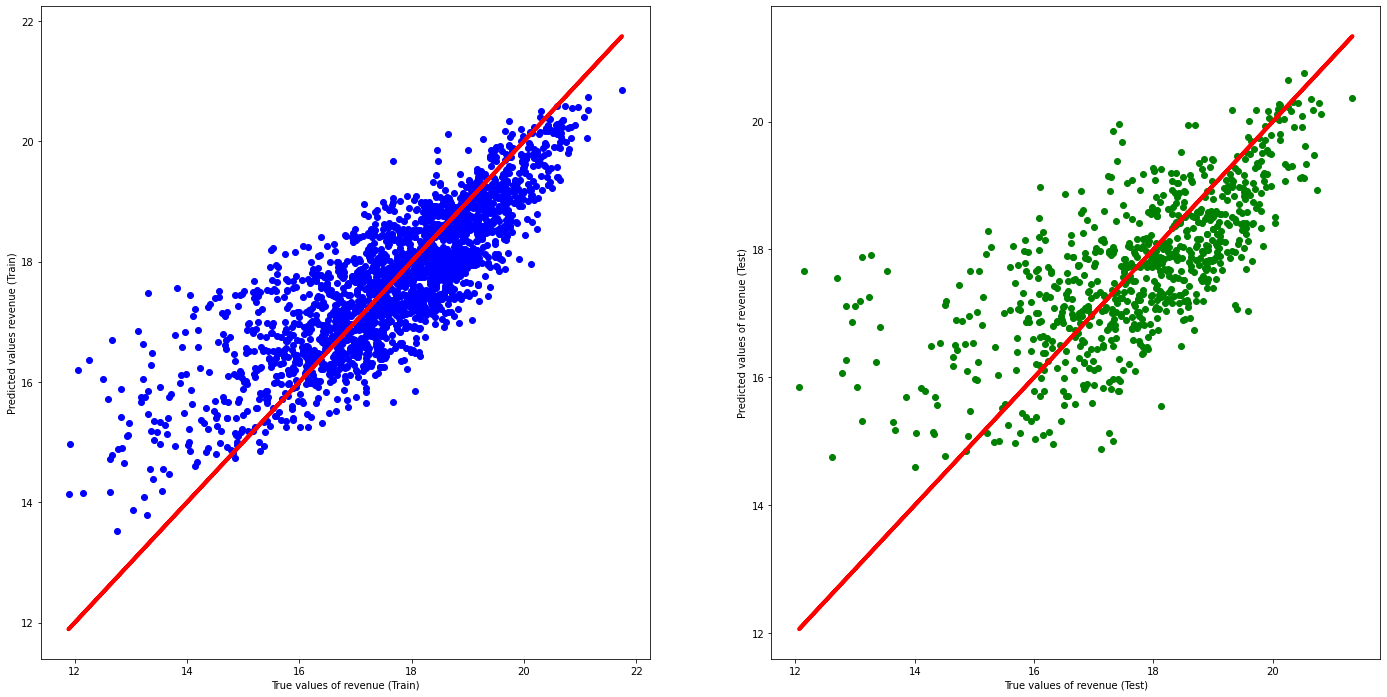

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6863681951548575
Mean Squared Error (MSE) 	: 0.7733133737172866

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4838450128376095
Mean Squared Error (MSE) 	: 1.3126907042773186



In [151]:
X_train = pd.DataFrame(train[['revenue', 'popularity', 'vote_count']]).drop(['revenue'], axis = 1)
y_train = pd.DataFrame(train['revenue'])
X_test = pd.DataFrame(test[['revenue', 'popularity', 'vote_count']]).drop(['revenue'], axis = 1)
y_test = pd.DataFrame(test['revenue'])


print("Shape of train set:", X_train.shape, y_train.shape)
print("Shape of test set:", X_test.shape, y_test.shape)

xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train)

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 4)
axes[0].set_xlabel("True values of revenue (Train)")
axes[0].set_ylabel("Predicted values revenue (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 4)
axes[1].set_xlabel("True values of revenue (Test)")
axes[1].set_ylabel("Predicted values of revenue (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", xgb.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", xgb.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

The performance seems to be improved. It is easy to observe that post-elements are the parameters of the film's success. Now, let's see if we know all the pre-production elements and post-production elements if the performance can be improved

### Model 5: Predicting revenue base on both pre and post-production elements by using Linear Regression

Shape of train set: (2323, 26) (2323, 1)
Shape of test set: (775, 26) (775, 1)
Intercept of Regression 	: b =  [5.42548929]
Coefficients of Regression 	: a =  [[ 4.96376569e-01  7.36198919e-04 -2.48301992e-04 -2.34403436e-01
  -2.91903058e-01  7.97193529e-02  8.53275927e-02  1.06767745e-01
  -1.11022302e-16  1.13198664e-01 -8.55333211e-02 -4.55962887e-01
  -1.07145984e-01  0.00000000e+00 -1.64686459e-01 -2.15369080e-02
   9.30820694e-03 -1.92587548e-01  5.24749571e-01 -1.44376512e-01
   2.40346453e-01  3.71407839e-01  6.64761109e-02  1.41868351e-02
   6.24003852e-01  8.75469040e-03]]



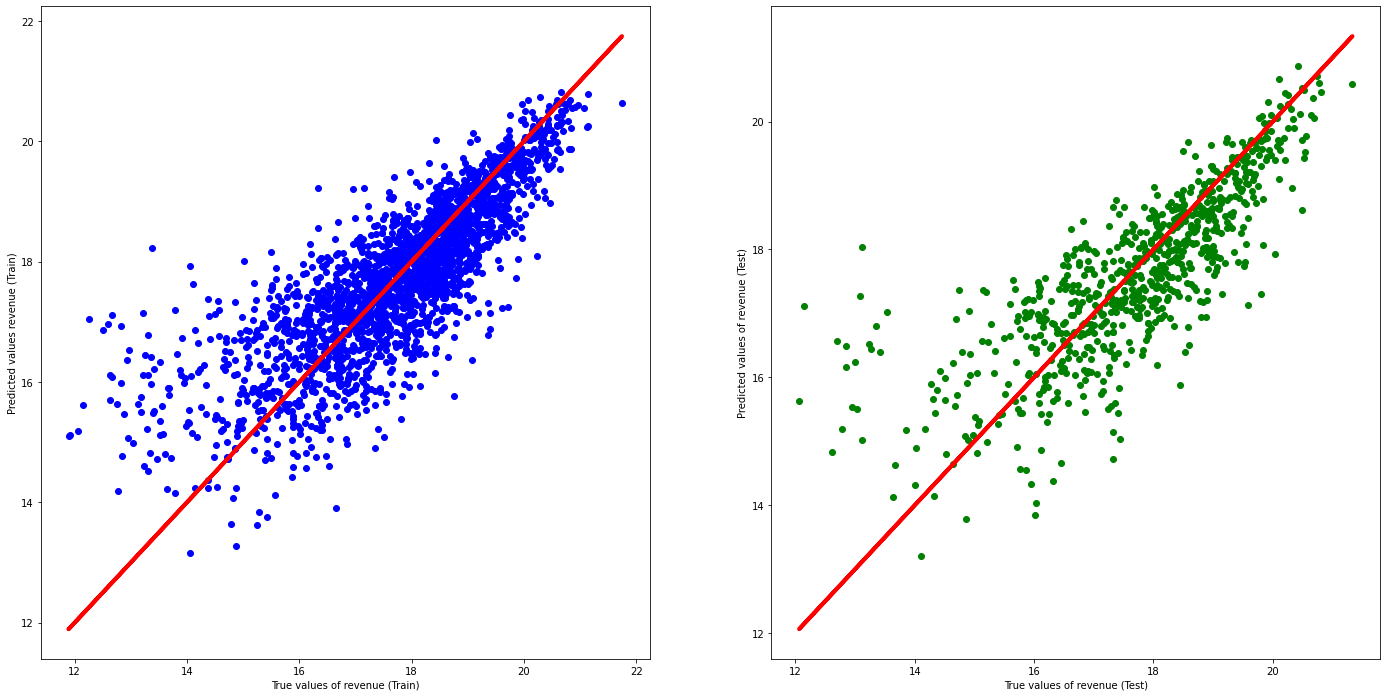

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6577717500699115
Mean Squared Error (MSE) 	: 0.8438228471932933

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6450902303278607
Mean Squared Error (MSE) 	: 0.9026101986674134



In [152]:
X_train = train.drop(['revenue'], axis = 1)
y_train = pd.DataFrame(train['revenue'])
X_test = test.drop(['revenue'], axis = 1)
y_test = pd.DataFrame(test['revenue'])
print("Shape of train set:", X_train.shape, y_train.shape)
print("Shape of test set:", X_test.shape, y_test.shape)

linreg = LinearRegression()         
linreg.fit(X_train, y_train)
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 4)
axes[0].set_xlabel("True values of revenue (Train)")
axes[0].set_ylabel("Predicted values revenue (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 4)
axes[1].set_xlabel("True values of revenue (Test)")
axes[1].set_ylabel("Predicted values of revenue (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

### Model 6: Predicting revenue base on both pre and post-production elements by using XgBoost

Shape of train set: (2323, 26) (2323, 1)
Shape of test set: (775, 26) (775, 1)


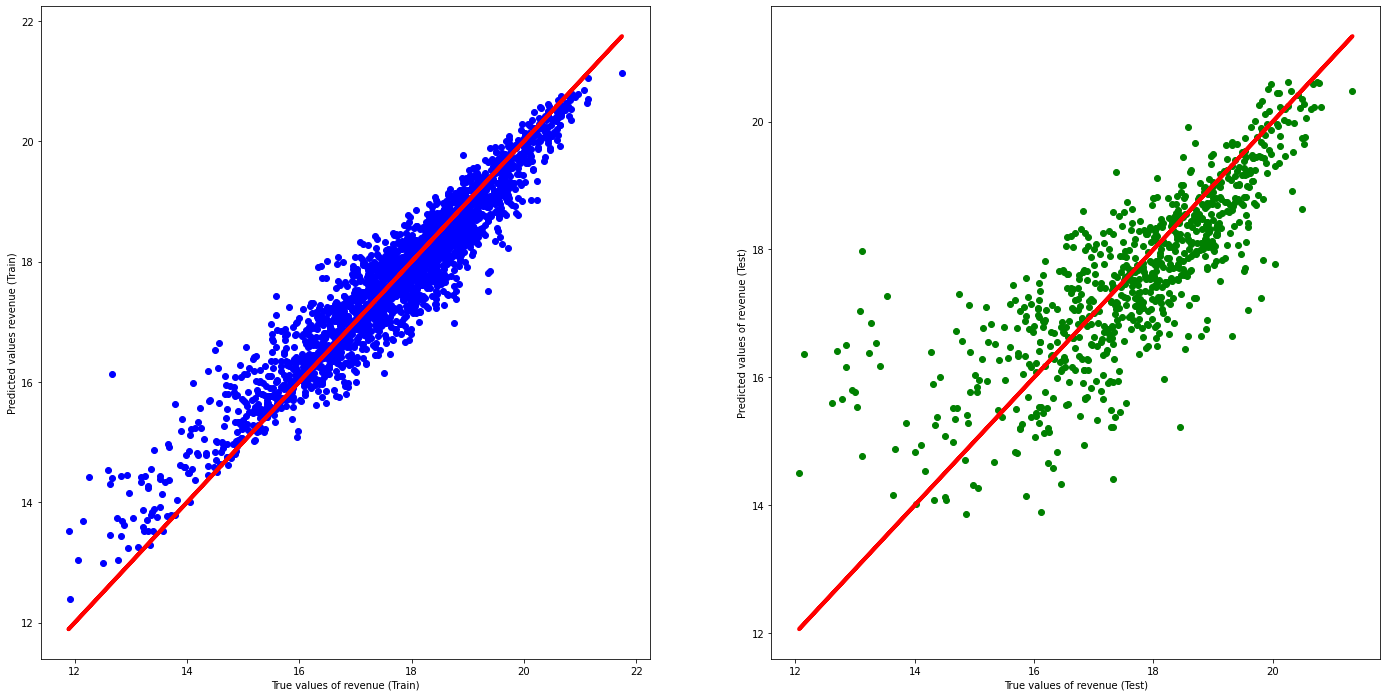

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8989433620510692
Mean Squared Error (MSE) 	: 0.24917259162348115

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6342127595423382
Mean Squared Error (MSE) 	: 0.93027389492404



In [153]:
X_train = train.drop(['revenue'], axis = 1)
y_train = pd.DataFrame(train['revenue'])
X_test = test.drop(['revenue'], axis = 1)
y_test = pd.DataFrame(test['revenue'])

print("Shape of train set:", X_train.shape, y_train.shape)
print("Shape of test set:", X_test.shape, y_test.shape)

xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train)

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 4)
axes[0].set_xlabel("True values of revenue (Train)")
axes[0].set_ylabel("Predicted values revenue (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 4)
axes[1].set_xlabel("True values of revenue (Test)")
axes[1].set_ylabel("Predicted values of revenue (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", xgb.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", xgb.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

We can see that, now, the performance of the model is much enhanced. 

## 7. Bonus: recommendation system base on content

Summary of the variables used:

- director: A list of director in each movie

- name_cast: A list of list of cast in each movie

- name_keywords: The list of list of keywords in each movie

- name_genres: The list of list of genres in each movie

We use director, cast, genres and keywords to build the recommendation system. With each variables, we choose only the first 3 elements (except for director as it has only one element)

In [154]:
combine = []
for item in zip(name_keywords, name_genres, director, name_cast):
    temp = ''
    for i in range(4):
        if i == 2:
            if temp != '':
                temp = temp + ' ' + item[2]
            else:
                temp = temp + item[2]
        else:
            for c in item[i]:
                if temp != '':
                    temp = temp + ' ' + c
                else:
                    temp = temp + c
    combine.append(temp)
    count = count+1

In [155]:
combine = pd.DataFrame(combine)
data_re = pd.concat([title, combine], axis = 1).reindex(title.index)
data_re.columns = ['title', 'combine']
data_re

,title,combine
0,Avatar,cultureclash future spacewar action adventure ...
1,Pirates of the Caribbean: At World's End,ocean drugabuse exoticisland adventure fantasy...
2,Spectre,spy basedonnovel secretagent action adventure ...
3,The Dark Knight Rises,dccomics crimefighter terrorist action crime d...
4,John Carter,basedonnovel mars medallion action adventure s...
...,...,...
4798,El Mariachi,unitedstates–mexicobarrier legs arms action cr...
4799,Newlyweds,comedy romance nicklove edwardburns kerrybishé...
4800,"Signed, Sealed, Delivered",date loveatfirstsight narration comedy drama r...
4801,Shanghai Calling,asgharfarhadi danielhenney elizacoupe billpaxton


We build a recommendation system based on the content. The input is the title of a film and we will recommend some films that are similar to the film, base on the combine variable

In [156]:
cv = CountVectorizer(stop_words = 'english')
count_matrix = cv.fit_transform(data_re['combine'])
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [157]:
data_re = data_re.reset_index()
indices = pd.Series(data_re.index, index=data_re['title'])

In [158]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return data_re['title'].iloc[movie_indices]

In [159]:
get_recommendations('Avatar', cosine_sim)

466                       The Time Machine
26              Captain America: Civil War
47                 Star Trek Into Darkness
94                 Guardians of the Galaxy
206                    Clash of the Titans
10                        Superman Returns
14                            Man of Steel
46              X-Men: Days of Future Past
61                       Jupiter Ascending
85     Captain America: The Winter Soldier
Name: title, dtype: object

In [160]:
get_recommendations('Batman Begins', cosine_sim)

3          The Dark Knight Rises
65               The Dark Knight
4638    Amidst the Devil's Wings
982                Run All Night
1742              Brick Mansions
3332                 Harry Brown
3603           Lone Wolf McQuade
4099                 Harsh Times
3326              Black November
1986                      Faster
Name: title, dtype: object

In [161]:
get_recommendations('Romeo Is Bleeding', cosine_sim)

2154                Street Kings
3          The Dark Knight Rises
1699         Along Came a Spider
4408              Jimmy and Judy
4638    Amidst the Devil's Wings
1986                      Faster
3359                 In Too Deep
1503                      Takers
2959          Machine Gun McCain
2915                       Trash
Name: title, dtype: object

So with every movie as input, the program will calculate the similarity score with other movies and finds the 10 most similar movies with the input movie to be the input.

## Reference:
Brownlee, Jason. “How to Remove Outliers for Machine Learning.” Machine Learning Mastery, 18 Aug. 2020, machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/.  <br><br>
WillKoehrsen. “WillKoehrsen/Data-Analysis.” GitHub, github.com/WillKoehrsen/Data-Analysis/tree/master/random_forest_explained. <br><br>
Sangeetha, Jame. “Json Parsing & Linear Regression Analysis.” Kaggle, Kaggle, 28 Mar. 2018, www.kaggle.com/sanjames/json-parsing-linear-regression-analysis. <br><br>
F.koglu, et al. “How Can I Increase the Accuracy of My Linear Regression Model?(Machine Learning with Python).” Stack Overflow, 1 Sept. 1966, stackoverflow.com/questions/47577168/how-can-i-increase-the-accuracy-of-my-linear-regression-modelmachine-learning. <br><br>
“Sklearn.linear_model.RidgeCV¶.” Scikit, scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html. <br><br>
“Sklearn.linear_model.RidgeCV¶.” Scikit, scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html. <br><br>
“Sklearn.svm.LinearSVR¶.” Scikit, scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html. <br><br>
Kushbhatnagar. “Movie Recommendation System.” Kaggle, Kaggle, 6 Apr. 2021, www.kaggle.com/kushbhatnagar/movie-recommendation-system. <br><br>
Burak Ergenc,"Predictions with XGboost and Linear Regression", https://www.kaggle.com/code/mburakergenc/predictions-with-xgboost-and-linear-regression/notebook<br><br>